In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from pillar_project.data_utils.dataset import FunctionalDataset

pd.set_option('display.max_columns', 500)

In [2]:
data_dir = Path("/data/dzeiberg/pillar_project")
data = pd.read_csv(data_dir / "dataframe" / "dataframe.csv")

/tmp/ipykernel_4004695/1232781828.py:2: DtypeWarning: Columns (3,9,11,12,13,16,20,21,32,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_dir / "dataframe" / "dataframe.csv")


In [8]:
dataset = FunctionalDataset(data[data.Dataset == "TSC2_tuberin_unpublished"])

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
def visualize(dataset):
    fig,ax = plt.subplots(1,1 + dataset.n_samples,figsize=((1 + dataset.n_samples)*5,5),sharey=True,sharex=True)
    for sampleNum,(sample_scores,sample_name) in enumerate(dataset.samples):
        sns.histplot(sample_scores,ax=ax[sampleNum],stat="density",label=f"{sample_name} n={len(sample_scores):,d}")
        ax[sampleNum].legend()
    sns.histplot(dataset.scores,ax=ax[-1],stat="density",label=f"all n={len(dataset.scores):,d}")
    ax[-1].legend()

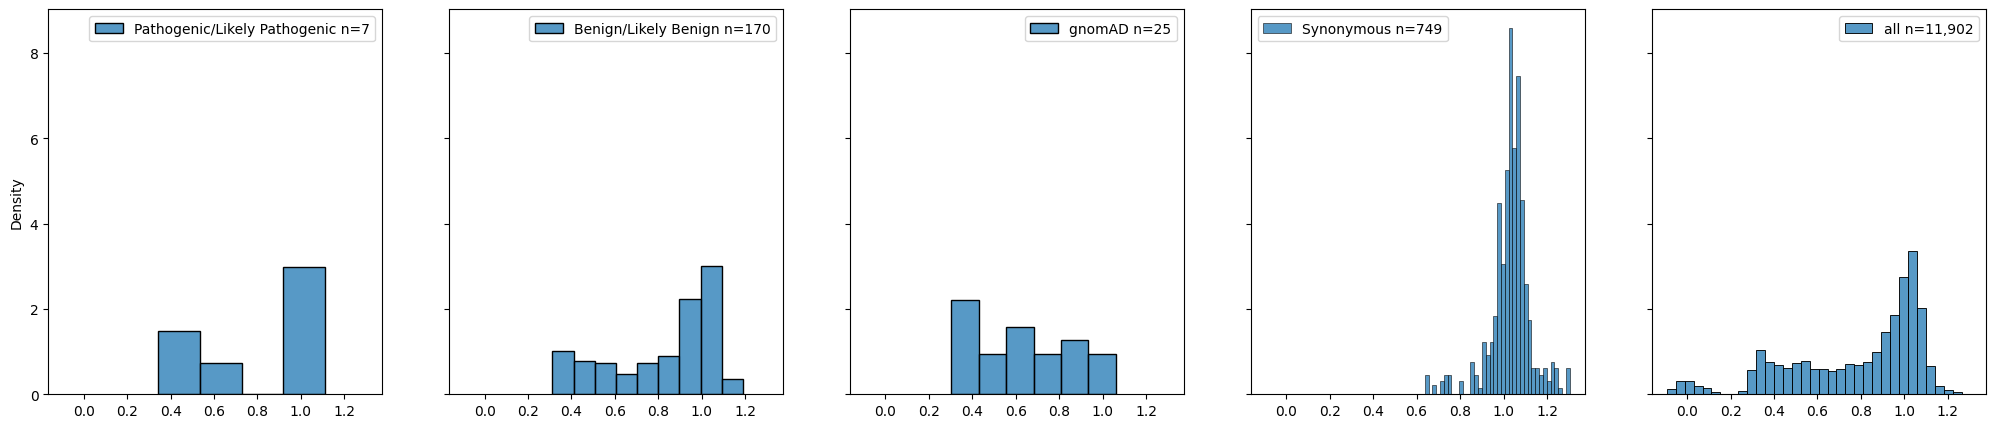

In [16]:
visualize(dataset)

In [12]:
dataset.dataframe.iloc[np.array([v.is_pathogenic_or_likely_pathogenic for v in dataset.variants])].sort_values('auth_reported_score')

,Dataset,Gene,HGNC_id,Chrom,hg19_pos,hg38_start,hg38_end,ref_allele,alt_allele,auth_transcript_id,transcript_pos,transcript_ref,transcript_alt,aa_pos,aa_ref,aa_alt,hgvs_c,hgvs_p,consequence,auth_reported_score,auth_reported_rep_score,auth_reported_func_class,auth_reported_normal_min,auth_reported_normal_max,auth_reported_abnormal_min,auth_reported_abnormal_max,splice_measure,gnomad_MAF,clinvar_sig,clinvar_star,clinvar_date_last_reviewed,nucleotide_or_aa,MaveDB URN,Ensembl_transript_ID,Ref_seq_transcript_ID,Model_system,Assay_type,Phenotype_measured,Phenotype_detail,IGVF_produced
322472,TSC2_tuberin_unpublished,TSC2,12363,16,NaN,2048724.0,2048724.0,G,T,NaN,109,NaN,NaN,37,L,*,NaN,p.Leu37Ter,stop_gained,-0.082198,-0.1089127251750079;-0.0554841327440437,NaN,NaN,NaN,NaN,NaN,No,NaN,Pathogenic,NaN,NaN,aa,NaN,ENST00000219476.9,NM_000548.5,immortalized human cells,Reporter,Fluorescence,Protein stability,Yes
322938,TSC2_tuberin_unpublished,TSC2,12363,16,NaN,2053342.0,2053344.0,CAC,TAA,NaN,226-228,NaN,NaN,76,L,*,NaN,p.Leu76Ter,"stop_gained,splice_region_variant",-0.051203,-0.0889947727402242;-0.0134112463334564,NaN,NaN,NaN,NaN,NaN,No,NaN,Pathogenic,NaN,NaN,aa,NaN,ENST00000219476.9,NM_000548.5,immortalized human cells,Reporter,Fluorescence,Protein stability,Yes
321010,TSC2_tuberin_unpublished,TSC2,12363,16,NaN,2048649.0,2048649.0,A,T,NaN,34,NaN,NaN,12,L,*,NaN,p.Leu12Ter,stop_gained,-0.032094,-0.0544570177717098;-0.0097305525895459,NaN,NaN,NaN,NaN,NaN,No,NaN,Pathogenic,NaN,NaN,aa,NaN,ENST00000219476.9,NM_000548.5,immortalized human cells,Reporter,Fluorescence,Protein stability,Yes
328488,TSC2_tuberin_unpublished,TSC2,12363,16,NaN,2053384.0,2053384.0,C,T,NaN,268,NaN,NaN,90,Y,*,NaN,p.Tyr90Ter,stop_gained,-0.031722,-0.0379969830448278;-0.0254465181833639,NaN,NaN,NaN,NaN,NaN,No,NaN,Pathogenic,NaN,NaN,aa,NaN,ENST00000219476.9,NM_000548.5,immortalized human cells,Reporter,Fluorescence,Protein stability,Yes
324702,TSC2_tuberin_unpublished,TSC2,12363,16,NaN,2054434.0,2054434.0,G,T,NaN,475,NaN,NaN,159,R,*,NaN,p.Arg159Ter,stop_gained,-0.028223,-0.02921717367838;-0.0272287837605566,NaN,NaN,NaN,NaN,NaN,No,NaN,Pathogenic,NaN,NaN,aa,NaN,ENST00000219476.9,NM_000548.5,immortalized human cells,Reporter,Fluorescence,Protein stability,Yes
317908,TSC2_tuberin_unpublished,TSC2,12363,16,NaN,2053361.0,2053361.0,G,A,NaN,245,NaN,NaN,82,D,*,NaN,p.Asp82Ter,stop_gained,-0.023696,-0.1010865062246258;0.0536954217104841,NaN,NaN,NaN,NaN,NaN,No,NaN,Pathogenic,NaN,NaN,aa,NaN,ENST00000219476.9,NM_000548.5,immortalized human cells,Reporter,Fluorescence,Protein stability,Yes
317909,TSC2_tuberin_unpublished,TSC2,12363,16,NaN,2053362.0,2053362.0,G,A,NaN,246,NaN,NaN,82,D,*,NaN,p.Asp82Ter,stop_gained,-0.023696,-0.1010865062246258;0.0536954217104841,NaN,NaN,NaN,NaN,NaN,No,NaN,Pathogenic,NaN,NaN,aa,NaN,ENST00000219476.9,NM_000548.5,immortalized human cells,Reporter,Fluorescence,Protein stability,Yes
320757,TSC2_tuberin_unpublished,TSC2,12363,16,NaN,2048751.0,2048751.0,A,T,NaN,136,NaN,NaN,46,K,*,NaN,p.Lys46Ter,"stop_gained,splice_region_variant",-0.019896,-0.0708671915536488;0.0310761580427616,NaN,NaN,NaN,NaN,NaN,No,NaN,Pathogenic,NaN,NaN,aa,NaN,ENST00000219476.9,NM_000548.5,immortalized human cells,Reporter,Fluorescence,Protein stability,Yes
319877,TSC2_tuberin_unpublished,TSC2,12363,16,NaN,2050481.0,2050481.0,G,T,NaN,220,NaN,NaN,74,H,*,NaN,p.His74Ter,stop_gained,-0.018852,-0.0247496303444851;-0.0129549459785394,NaN,NaN,NaN,NaN,NaN,No,NaN,Pathogenic,NaN,NaN,aa,NaN,ENST00000219476.9,NM_000548.5,immortalized human cells,Reporter,Fluorescence,Protein stability,Yes
327094,TSC2_tuberin_unpublished,TSC2,12363,16,NaN,2048641.0,2048641.0,C,G,NaN,26,NaN,NaN,9,T,*,NaN,p.Thr9Ter,stop_gained,0.023651,-0.0115044218260839;0.0588055790263985,NaN,NaN,NaN,NaN,NaN,No,NaN,Pathogenic,NaN,NaN,aa,NaN,ENST00000219476.9,NM_000548.5,immortalized human cells,Reporter,Fluorescence,Protein stability,Yes
